Loading packages and data

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp
from scipy import stats

In [2]:
# read in data
PATH_TO_WORKBOOK = Path("../data/")
EXCEL_WORKBOOK = "measurements_b3_2.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="metafile_niacin_2")

grouping the animals and exploring the data frame

In [3]:
def get_value(row):
    if row['sex'] == 'female' and row['diet'] == 'control' and row['sucrose'] == 'Yes':
        return 0
    elif row['sex'] == 'female' and row['diet'] == 'control' and row['sucrose'] == 'No':
        return 1
    elif row['sex'] == 'female' and row['diet'] == 'experimental' and row['sucrose'] == 'Yes':
        return 2
    elif row['sex'] == 'female' and row['diet'] == 'experimental' and row['sucrose'] == 'No':
        return 3
    elif row['sex'] == 'male' and row['diet'] == 'control' and row['sucrose'] == 'Yes':
        return 4
    elif row['sex'] == 'male' and row['diet'] == 'control' and row['sucrose'] == 'No':
        return 5
    elif row['sex'] == 'male' and row['diet'] == 'experimental' and row['sucrose'] == 'Yes':
        return 6
    elif row['sex'] == 'male' and row['diet'] == 'experimental' and row['sucrose'] == 'No':
        return 7
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("animal_id != 'B3201'")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "diet": "category",
                     "date": object, 
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "sucrose_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))


In [4]:
df

,animal_id,sex,diet,date,sucrose,bodyweight,food_yesterday,food_today,food_intake,sucrose_yesterday,sucrose_today,sucrose_intake,None,None,None,groupn
1,B3202,female,control,2024-04-06 00:00:00,No,21.0,-1.0,98.6,-1.000000,-1,-1,-1.000000,None,None,None,1
2,B3203,female,experimental,2024-04-06 00:00:00,No,21.2,-1.0,139.3,-1.000000,-1,-1,-1.000000,None,None,None,3
3,B3204,female,experimental,2024-04-06 00:00:00,No,20.4,-1.0,139.3,-1.000000,-1,-1,-1.000000,None,None,None,3
4,B3205,female,control,2024-04-06 00:00:00,No,19.8,-1.0,80.2,-1.000000,-1,-1,-1.000000,None,None,None,1
5,B3206,female,control,2024-04-06 00:00:00,No,19.3,-1.0,81.9,-1.000000,-1,-1,-1.000000,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,B3244,male,experimental,2024-05-21 00:00:00,No,31.2,31.8,23.2,2.866667,-1,-1,-1.000000,None,None,None,7
764,B3245,male,experimental,2024-05-21 00:00:00,No,31.5,47.3,37.5,3.266667,-1,-1,-1.000000,None,None,None,7
765,B3246,male,experimental,2024-05-21 00:00:00,No,33.8,49.6,37.9,3.900000,-1,-1,-1.000000,None,None,None,7
766,B3247,male,experimental,2024-05-21 00:00:00,Yes,31.2,49.0,44.2,1.600000,54.6,36.5,6.033333,None,None,None,6


In [5]:
df.dtypes

animal_id              object
sex                  category
diet                 category
date                   object
sucrose                object
bodyweight            float64
food_yesterday        float64
food_today             object
food_intake           float64
sucrose_yesterday      object
sucrose_today          object
sucrose_intake        float64
None                   object
None                   object
None                   object
groupn                  int64
dtype: object

In [6]:
df.columns

Index([        'animal_id',               'sex',              'diet',
                    'date',           'sucrose',        'bodyweight',
          'food_yesterday',        'food_today',       'food_intake',
       'sucrose_yesterday',     'sucrose_today',    'sucrose_intake',
                      None,                None,                None,
                  'groupn'],
      dtype='object')

In [7]:
df.animal_id.unique()
df.date.unique()

array([Timestamp('2024-04-06 00:00:00'), Timestamp('2024-04-09 00:00:00'),
       Timestamp('2024-04-12 00:00:00'), Timestamp('2024-04-15 00:00:00'),
       Timestamp('2024-04-18 00:00:00'), Timestamp('2024-04-21 00:00:00'),
       Timestamp('2024-04-24 00:00:00'), Timestamp('2024-04-27 00:00:00'),
       Timestamp('2024-04-30 00:00:00'), Timestamp('2024-05-03 00:00:00'),
       Timestamp('2024-05-06 00:00:00'), Timestamp('2024-05-09 00:00:00'),
       Timestamp('2024-05-12 00:00:00'), Timestamp('2024-05-15 00:00:00'),
       Timestamp('2024-05-18 00:00:00'), Timestamp('2024-05-21 00:00:00')],
      dtype=object)

In [8]:
df.groupby(["sex", "diet", "date"]).mean(numeric_only=True).reset_index()

,sex,diet,date,bodyweight,food_yesterday,food_intake,sucrose_intake,groupn
0,female,control,2024-04-06,20.627273,-1.000000,-1.000000,-1.000000,1.000000
1,female,control,2024-04-09,20.418182,79.336364,2.751515,-1.000000,1.000000
2,female,control,2024-04-12,20.809091,69.445455,2.978788,-1.000000,0.454545
3,female,control,2024-04-15,21.145455,58.827273,2.300000,2.290909,0.454545
4,female,control,2024-04-18,21.845455,58.981818,2.357576,2.303030,0.454545
...,...,...,...,...,...,...,...,...
59,male,experimental,2024-05-09,30.450000,48.675000,2.502778,2.255556,6.500000
60,male,experimental,2024-05-12,31.033333,48.925000,2.586111,1.919444,6.500000
61,male,experimental,2024-05-15,31.316667,43.458333,2.388889,2.525000,6.500000
62,male,experimental,2024-05-18,32.516667,52.841667,2.766667,1.877778,6.500000


In [9]:
# remove outliers
# is done by creating the new dataframe df_food_water
# Clean up df


def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 0.3:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    
    print("the number of outliers being replaced for", column, "is", np.sum(np.isnan(values)))
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(bodyweight = lambda df_: replace_outliers(df_, "bodyweight"))
    )

df_food_water = remove_and_clean(df)

# need function to replace sucrose leak values with something reasonable

the number of outliers being replaced for food_intake is 7
the number of outliers being replaced for bodyweight is 7


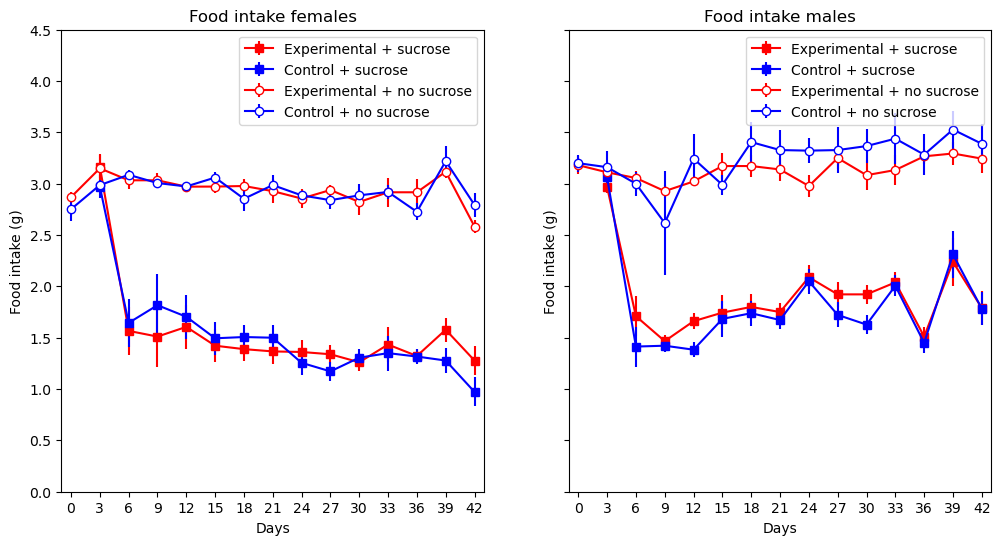

In [10]:
# Find mean and SEM of all data - food intake
mean_fw = df_food_water.groupby(["sex", "diet", "sucrose", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "diet", "sucrose","date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [1, 1]},)

# Females

# Set x values
x = np.arange(0, len(mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = np.arange(0, len(mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42]

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and sucrose =='Yes' and diet == 'control'").food_intake,
               marker="s", markerfacecolor="red", color="red",
               label="Experimental + sucrose"
              )

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and sucrose =='Yes' and diet == 'control'").food_intake,
               marker="s", markerfacecolor="blue", color="blue",
               label="Control + sucrose"
              )

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'No' and diet == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and sucrose == 'No' and diet == 'experimental'").food_intake,
               marker="o", markerfacecolor="white", color="red",
               label="Experimental + no sucrose"
              )

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'No' and diet == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and sucrose == 'No' and diet == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="Control + no sucrose"
              )

# Set x axis limits and ticks
ax[0].set_xlim([-1, x[-1]+1])
ax[0].set_xticks(np.arange(0, x[-1]+1, 3)) 
ax[0].set_ylim([0, 4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")
ax[0].legend()
ax[0].set_title("Food intake females")



# Males
x = np.arange(0, len(mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = np.arange(0, len(mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42]

# Plot data for each group in first subplot
ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and sucrose =='Yes' and diet == 'control'").food_intake,
               marker="s", markerfacecolor="red", color="red",
               label="Experimental + sucrose"
              )

ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and sucrose =='Yes' and diet == 'control'").food_intake,
               marker="s", markerfacecolor="blue", color="blue",
               label="Control + sucrose"
              )

ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'No' and diet == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and sucrose == 'No' and diet == 'experimental'").food_intake,
               marker="o", markerfacecolor="white", color="red",
               label="Experimental + no sucrose"
              )

ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'No' and diet == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and sucrose == 'No' and diet == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="Control + no sucrose"
              )

# Set x axis limits and ticks
ax[1].set_xlim([-1, x[-1]+1])
ax[1].set_xticks(np.arange(0, x[-1]+1, 3)) 
ax[1].set_ylim([0, 4.5])

# Add labels
ax[1].set_ylabel("Food intake (g)")
ax[1].set_xlabel("Days")
ax[1].legend()
ax[1].set_title("Food intake males")


f.savefig("..//results//foodintake.png")

In [11]:
## for when you kinda want the dots/datapoints of the graph not to overlap, add this to some of them
## use it instead of the x at the errorbar
[xval + 0.1 for xval in x]

[0.1,
 3.1,
 6.1,
 9.1,
 12.1,
 15.1,
 18.1,
 21.1,
 24.1,
 27.1,
 30.1,
 33.1,
 36.1,
 39.1,
 42.1]

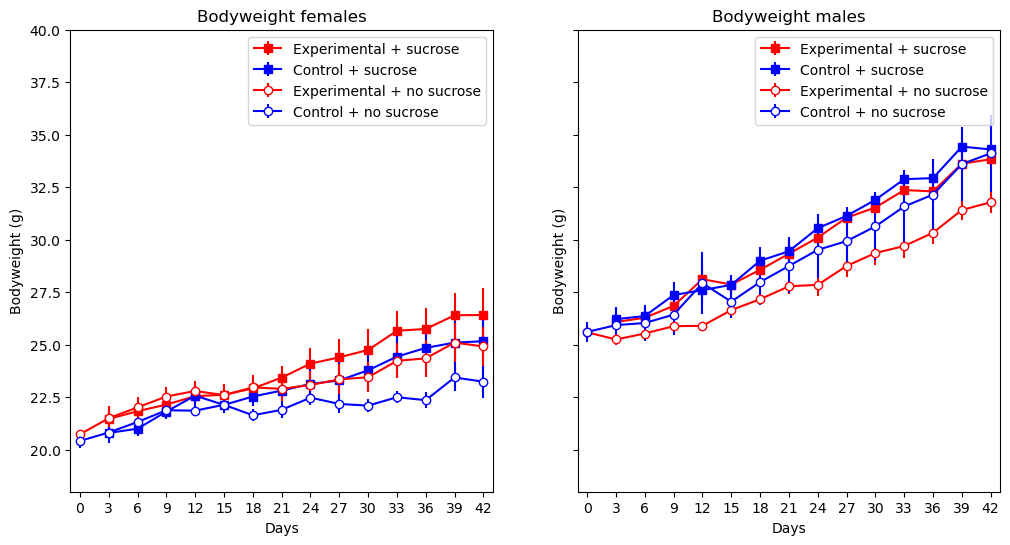

In [16]:
# Find mean and SEM of all data - body weight
mean_fw = df_food_water.groupby(["sex", "diet", "sucrose", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "diet", "sucrose","date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [1, 1]},)

# Females

# Set x values
x = np.arange(0, len(mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = np.arange(0, len(mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42]

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'").bodyweight,
               yerr=sem_fw.query("sex == 'female' and sucrose =='Yes' and diet == 'control'").bodyweight,
               marker="s", markerfacecolor="red", color="red",
               label="Experimental + sucrose"
              )

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'control'").bodyweight,
               yerr=sem_fw.query("sex == 'female' and sucrose =='Yes' and diet == 'control'").bodyweight,
               marker="s", markerfacecolor="blue", color="blue",
               label="Control + sucrose"
              )

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'No' and diet == 'experimental'").bodyweight,
               yerr=sem_fw.query("sex == 'female' and sucrose == 'No' and diet == 'experimental'").bodyweight,
               marker="o", markerfacecolor="white", color="red",
               label="Experimental + no sucrose"
              )

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'No' and diet == 'control'").bodyweight,
               yerr=sem_fw.query("sex == 'female' and sucrose == 'No' and diet == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="Control + no sucrose"
              )

# Set x axis limits and ticks
ax[0].set_xlim([-1, x[-1]+1])
ax[0].set_xticks(np.arange(0, x[-1]+1, 3)) 
ax[0].set_ylim([18, 40])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")
ax[0].legend()
ax[0].set_title("Bodyweight females")



# Males
x = np.arange(0, len(mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = np.arange(0, len(mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42]

# Plot data for each group in first subplot
ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'").bodyweight,
               yerr=sem_fw.query("sex == 'male' and sucrose =='Yes' and diet == 'control'").bodyweight,
               marker="s", markerfacecolor="red", color="red",
               label="Experimental + sucrose"
              )

ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'control'").bodyweight,
               yerr=sem_fw.query("sex == 'male' and sucrose =='Yes' and diet == 'control'").bodyweight,
               marker="s", markerfacecolor="blue", color="blue",
               label="Control + sucrose"
              )

ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'No' and diet == 'experimental'").bodyweight,
               yerr=sem_fw.query("sex == 'male' and sucrose == 'No' and diet == 'experimental'").bodyweight,
               marker="o", markerfacecolor="white", color="red",
               label="Experimental + no sucrose"
              )

ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'No' and diet == 'control'").bodyweight,
               yerr=sem_fw.query("sex == 'male' and sucrose == 'No' and diet == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="Control + no sucrose"
              )

# Set x axis limits and ticks
ax[1].set_xlim([-1, x[-1]+1])
ax[1].set_xticks(np.arange(0, x[-1]+1, 3)) 
ax[1].set_ylim([18, 40])

# Add labels
ax[1].set_ylabel("Bodyweight (g)")
ax[1].set_xlabel("Days")
ax[1].legend()
ax[1].set_title("Bodyweight males")


f.savefig("..//results//bodyweight.png")

In [13]:
# sucrose has some outliers as well, that will be removed in this cell. However, for whatever reason as soon as this is done,
# the rest of the dataset becomes completely off for the other figures. Therefore, the cleaned dataset will be stored in a 
# new dataset.

import numpy as np

def replace_outliers(df_food_water, column):
    values = []
    for idx, row in df_food_water.iterrows():
        if row[column] in [-1, -2]:  # Checking for both -1 and -2
            values.append(np.nan)
        else:
            values.append(row[column])

    print("The number of outliers being replaced for", column, "is", np.sum(np.isnan(values)))
    df_food_water[column] = values
    mean_by_animal = df_food_water.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

    values = []
    for idx, row in df_food_water.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])

    return values

def remove_and_clean(df_food_water):
    return (df_food_water
            .assign(food_intake=lambda df_food_water: replace_outliers(df_food_water, "sucrose_intake")))

df_sucrose = remove_and_clean(df_food_water)


The number of outliers being replaced for sucrose_intake is 395


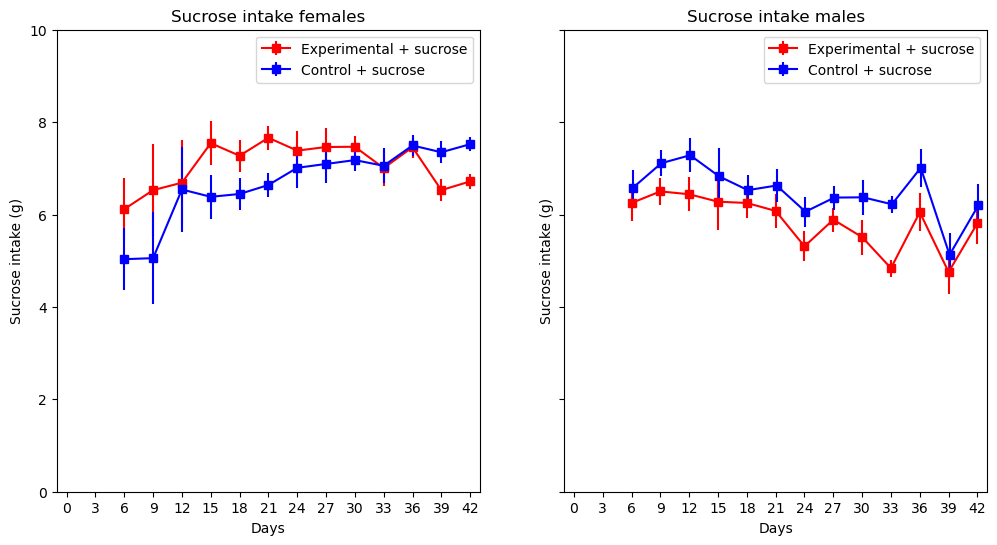

In [15]:
# Find mean and SEM of all data - food intake
mean_fw = df_sucrose.groupby(["sex", "diet", "sucrose", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_sucrose.groupby(["sex", "diet", "sucrose","date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [1, 1]},)

# Females

# Set x values
x = np.arange(0, len(mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = np.arange(0, len(mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42]

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'experimental'").sucrose_intake,
               yerr=sem_fw.query("sex == 'female' and sucrose =='Yes' and diet == 'control'").sucrose_intake,
               marker="s", markerfacecolor="red", color="red",
               label="Experimental + sucrose"
              )

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and sucrose == 'Yes' and diet == 'control'").sucrose_intake,
               yerr=sem_fw.query("sex == 'female' and sucrose =='Yes' and diet == 'control'").sucrose_intake,
               marker="s", markerfacecolor="blue", color="blue",
               label="Control + sucrose"
              )

# Set x axis limits and ticks
ax[0].set_xlim([-1, x[-1]+1])
ax[0].set_xticks(np.arange(0, x[-1]+1, 3)) 
ax[0].set_ylim([0, 10])

# Add labels
ax[0].set_ylabel("Sucrose intake (g)")
ax[0].set_xlabel("Days")
ax[0].legend()
ax[0].set_title("Sucrose intake females")



# Males
x = np.arange(0, len(mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = np.arange(0, len(mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'"))*3, 3)
x = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42]

# Plot data for each group in first subplot
ax[1].errorbar(x,
               mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'experimental'").sucrose_intake,
               yerr=sem_fw.query("sex == 'male' and sucrose =='Yes' and diet == 'control'").sucrose_intake,
               marker="s", markerfacecolor="red", color="red",
               label="Experimental + sucrose"
              )

ax[1].errorbar([xval + 0.1 for xval in x],
               mean_fw.query("sex == 'male' and sucrose == 'Yes' and diet == 'control'").sucrose_intake,
               yerr=sem_fw.query("sex == 'male' and sucrose =='Yes' and diet == 'control'").sucrose_intake,
               marker="s", markerfacecolor="blue", color="blue",
               label="Control + sucrose"
              )

# Set x axis limits and ticks
ax[1].set_xlim([-1, x[-1]+1])
ax[1].set_xticks(np.arange(0, x[-1]+1, 3)) 
ax[1].set_ylim([0, 10])

# Add labels
ax[1].set_ylabel("Sucrose intake (g)")
ax[1].set_xlabel("Days")
ax[1].legend()
ax[1].set_title("Sucrose intake males")


f.savefig("..//results//sucroseintake.png")